In [1]:
import audioread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
import IPython.display as ipd
import os
from glob import glob

In [2]:
data_dir = "./datasets/"
audio_files = glob(data_dir + '/*.wav')
print(len(audio_files))

308


In [3]:
x =[]
for i in range(len(audio_files)):
    with audioread.audio_open(audio_files[i]) as f: 
        x.append(list(( audio_files[i] , f.channels ,  f.samplerate , f.duration)))


In [4]:
pd.DataFrame(x, columns = ["Filename", "# of Channels", "Sampling Frequency", "Duration"])

,Filename,# of Channels,Sampling Frequency,Duration
0,./datasets\0.wav,1,44100,4.778005
1,./datasets\1.wav,1,44100,4.922630
2,./datasets\10.wav,1,44100,4.922630
3,./datasets\100.wav,1,44100,4.922630
4,./datasets\101.wav,1,44100,4.922630
...,...,...,...,...
303,./datasets\95.wav,1,44100,4.922630
304,./datasets\96.wav,1,44100,4.922630
305,./datasets\97.wav,1,44100,4.922630
306,./datasets\98.wav,1,44100,4.922630


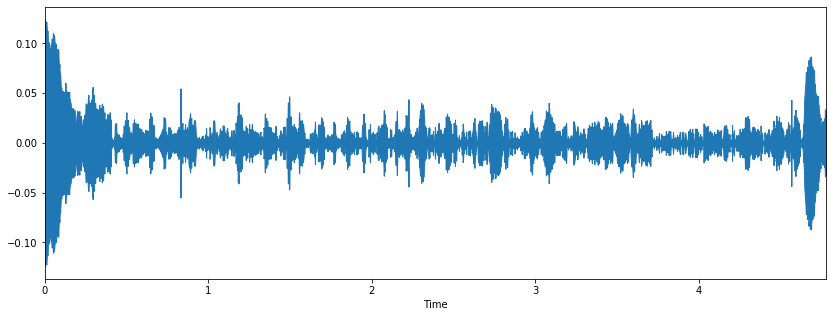

In [5]:
#Audio Before Preprocessing
audio , sfreq = lr.load(audio_files[0])
plt.figure(figsize=(14, 5))
lr.display.waveplot(audio, sr=sfreq)
ipd.Audio(audio_files[0])

In [6]:
#High- Pass Filter
import os
from scipy.io import wavfile
from scipy import signal

cwd = os.getcwd()
path = os.path.join(cwd, r'filtered_audio')

if not os.path.exists(path) :
    os.makedirs(path)
    
for i in range(len(audio_files)) :
    sr,x = wavfile.read(audio_files[i])
    b = signal.firwin(101, cutoff=1300, fs=sr, pass_zero=False)
    x = signal.lfilter(b, [1.0], x)
    filename = 'filtered_audio/' + str(i) + '.wav'
    wavfile.write(filename, sr, x.astype(np.int16))

In [7]:
#Normalization of the Audio
import os 

cwd = os.getcwd()
path = os.path.join(cwd , r'normalized')

data_dir = "./filtered_audio/"
filtered = glob(data_dir + '/*.wav')

if not os.path.exists(path):
    os.makedirs(path)
    
for i in range(len(filtered)):
    audio , sfreq = lr.load(filtered[i])
    new = librosa.util.normalize(audio)
    filename = 'normalized/' + str(i) + '.wav'
    wavfile.write(filename, sfreq, audio)



# plt.figure(figsize=(14, 5))
# lr.display.waveplot(new, sr=sfreq)
# print(new)
# ipd.Audio('filtered.wav')

Running
Running
Running
Running
Running
Running


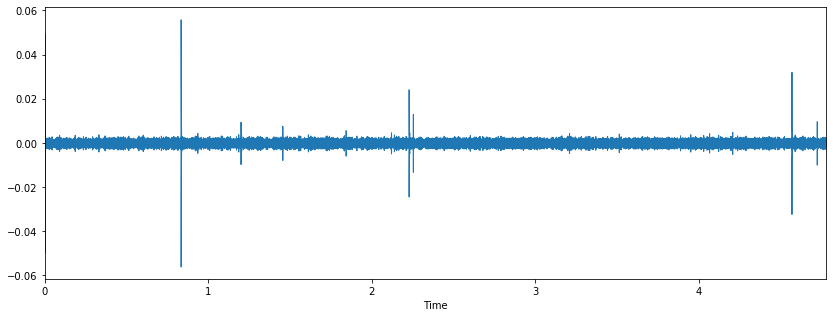

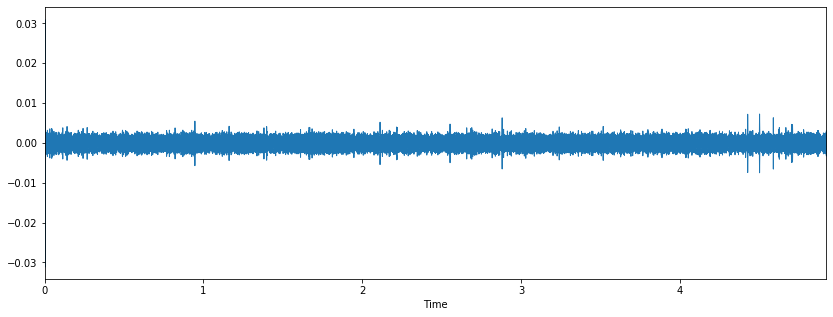

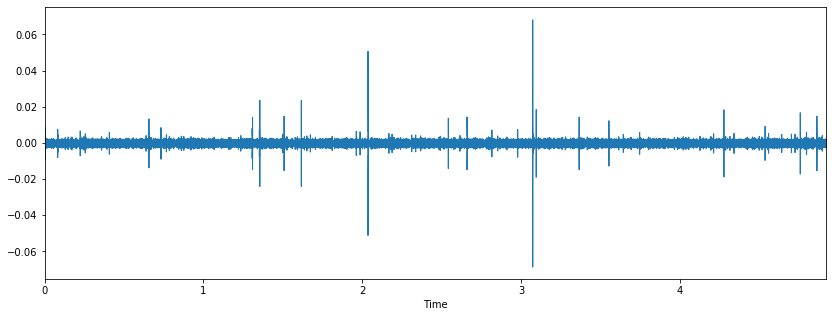

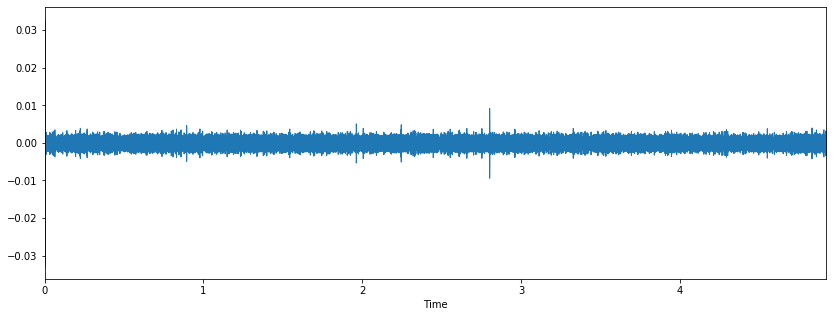

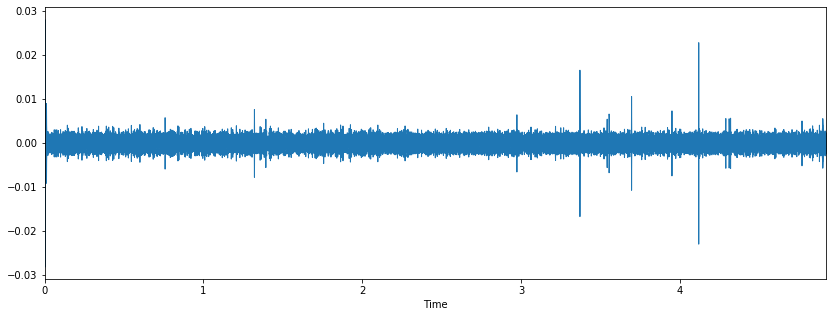

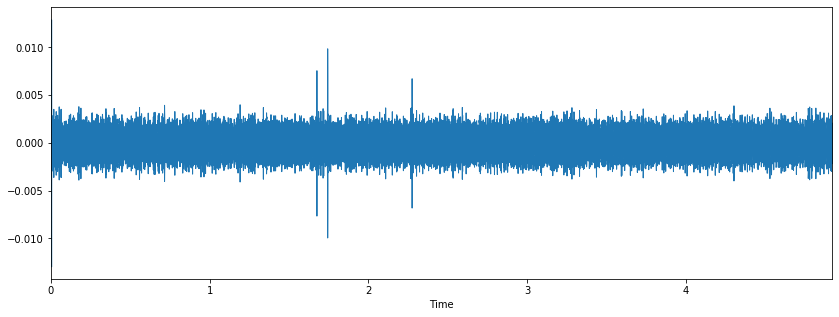

In [8]:
#Visualize

for i in range(6): 
    audio , sfreq = lr.load(filtered[i])
    plt.figure(figsize=(14, 5))
    lr.display.waveplot(audio, sr=sfreq)
    ipd.Audio(filtered[i])
    print("Running")

In [9]:
#Normalization
from pydub import effects, AudioSegment  
_sound = AudioSegment.from_file("filtered.wav", "wav")  
sound = effects.normalize(_sound)  
sound.export("normalize.wav", format="wav")

<_io.BufferedRandom name='normalize.wav'>

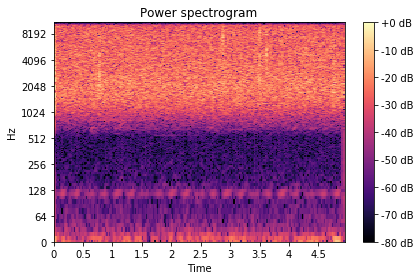

In [3]:
audio , sfreq = lr.load('normalize.wav')
D = np.abs(librosa.stft(audio,window ='hamm'))
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

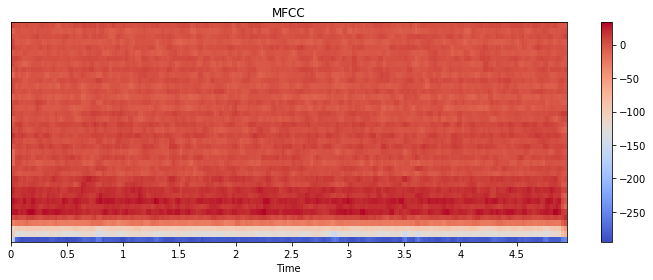

In [11]:
y, sr = lr.load('normalize.wav')
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()